In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

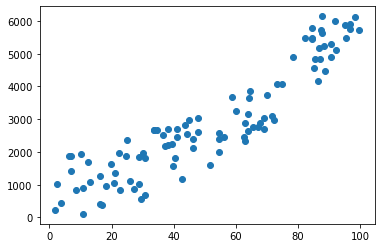

In [2]:
x = np.random.uniform(100., size=100)
x = np.sort(x)
y = 0.5 * x ** 2 + 3.56 * x + 1.5 + np.random.uniform(0, 2000, size=100)
plt.scatter(x, y)

In [3]:
poly = PolynomialFeatures(degree=2, include_bias=False)
x_fit = poly.fit_transform(x.reshape(-1, 1))
x_fit.shape

(100, 2)

In [4]:
LinReg = LinearRegression()
LinReg.fit(x_fit, y)

y_pred = LinReg.predict(x_fit)

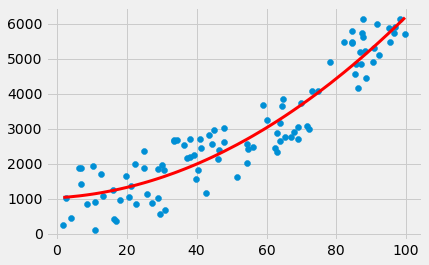

In [5]:
plt.style.use('fivethirtyeight')
plt.plot(x, y_pred, c='r', linewidth=3)
plt.scatter(x, y)

In [55]:
df = pd.read_csv('ds_salaries.csv')
df.drop(columns=['salary_in_usd', 'salary_currency', 'employee_residence'], inplace=True)
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


In [98]:
# df['job_title'].apply(lambda x: x.lower())
num = 0
for item in df['job_title'].unique():
    df['job_title'] = df['job_title'].str.replace(item, str(num))
    num += 1

num = 0
for item in df['company_location'].unique():
    df['company_location'] = df['company_location'].str.replace(item, str(num))
    num += 1

num = 0
for item in df['company_size'].unique():
    df['company_size'] = df['company_size'].str.replace(item, str(num))
    num += 1

num = 0
for item in df['experience_level'].unique():
    df['experience_level'] = df['experience_level'].str.replace(item, str(num))
    num += 1
    
num = 0
for item in df['employment_type'].unique():
    df['employment_type'] = df['employment_type'].str.replace(item, str(num))
    num += 1
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,remote_ratio,company_location,company_size
0,0,2020,0,0,0,70000,0,0,0
1,1,2020,1,0,1,260000,0,1,1
2,2,2020,1,0,2,85000,50,2,2
3,3,2020,0,0,3,20000,0,3,1
4,4,2020,1,0,4,150000,50,4,0
...,...,...,...,...,...,...,...,...,...
602,602,2022,1,0,10,154000,100,4,2
603,603,2022,1,0,10,126000,100,4,2
604,604,2022,1,0,5,129000,0,4,2
605,605,2022,1,0,5,150000,100,4,2


In [75]:
# dic = dict.fromkeys(df['job_title'].unique(), range(40))

In [117]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['salary'])
y = df.salary
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, y_train.shape

((485, 8), (485,))

In [118]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
RandFor = RandomForestRegressor()
RandFor.fit(x_train, y_train)

y_pred = RandFor.predict(x_test)
y_test = np.array(y_test)
# metrics.accuracy_score(y_test, y_pred)
y_test